<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Background" data-toc-modified-id="Background-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Background</a></span></li><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Data-Cleansing" data-toc-modified-id="Data-Cleansing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Cleansing</a></span><ul class="toc-item"><li><span><a href="#Songs" data-toc-modified-id="Songs-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Songs</a></span></li><li><span><a href="#Tags" data-toc-modified-id="Tags-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Tags</a></span></li><li><span><a href="#Unknown-Songs" data-toc-modified-id="Unknown-Songs-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Unknown Songs</a></span></li><li><span><a href="#Playlist" data-toc-modified-id="Playlist-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Playlist</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Song2Vec" data-toc-modified-id="Song2Vec-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Song2Vec</a></span><ul class="toc-item"><li><span><a href="#Training" data-toc-modified-id="Training-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Loss-Evaluation" data-toc-modified-id="Loss-Evaluation-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Loss Evaluation</a></span></li><li><span><a href="#Vectors-Visualization" data-toc-modified-id="Vectors-Visualization-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Vectors Visualization</a></span></li></ul></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Clustering</a></span><ul class="toc-item"><li><span><a href="#Sperical-K-Means" data-toc-modified-id="Sperical-K-Means-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Sperical K-Means</a></span></li><li><span><a href="#Visualize-Clusters" data-toc-modified-id="Visualize-Clusters-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Visualize Clusters</a></span></li></ul></li></ul></li><li><span><a href="#Start-Recommending" data-toc-modified-id="Start-Recommending-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Start Recommending</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Evaluation</a></span><ul class="toc-item"><li><span><a href="#Random-Recommender" data-toc-modified-id="Random-Recommender-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Random Recommender</a></span></li><li><span><a href="#Song-Tags-Recommender" data-toc-modified-id="Song-Tags-Recommender-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Song Tags Recommender</a></span></li><li><span><a href="#Cluster-based-Recommender" data-toc-modified-id="Cluster-based-Recommender-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Cluster-based Recommender</a></span></li><li><span><a href="#Song2Vec-Recommender" data-toc-modified-id="Song2Vec-Recommender-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Song2Vec Recommender</a></span></li><li><span><a href="#Comparison" data-toc-modified-id="Comparison-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Comparison</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Song2Vec for Music Recommender

## Background

The behavior of musicophiles has changed along with the evolvement of the music industry in the past decades. Previously we conservatively bought music on a compact disc, but now music streaming services are more preferable; such as Amazon Music,
Apple Music, Google Play Music, Pandora, Spotify, Youtube Music, to name a few. This is because of the convenience offered by these platforms so that users are able to search their favorite songs right away without having to bother going to the music store physically.

Users may not have enough time to scan through all available songs and manually create a playlist. Instead, a recommender system is constructed which eases them to find relevant songs quickly. One example you might seen before is the "Made For You" feature from Spotify:

<img src="assets/made-for-you.png" width="500">

These personalized playlists are being recommended by grouping similar songs that go well together. How? In the real case, this process is done by combining several recommender algorithms, simply based on users' activities such as likes, playlist history, or even listening history. In this article, we will demonstrate how to extract song embeddings using a neural network approach specifically **Word2Vec** model, use it to generate songs recommendation, and evaluate the performance.

Okay, so you might wonder what is Word2Vec actually? Developed by [Tomas Mikolov](https://arxiv.org/pdf/1310.4546.pdf) in 2013 at Google, it is one of the most common technique to do word embeddings in several Natural Language Processing (NLP) cases using shallow neural network. Word embeddings is just a fancy way of saying a numerical representation of words. A good analogy would be how colors are represented with a RGB values. These set of values is then called as a **vector**. For example, "black" can be associated with (0,0,0) and "white" with (255,255,255) as their pixel intensity values.

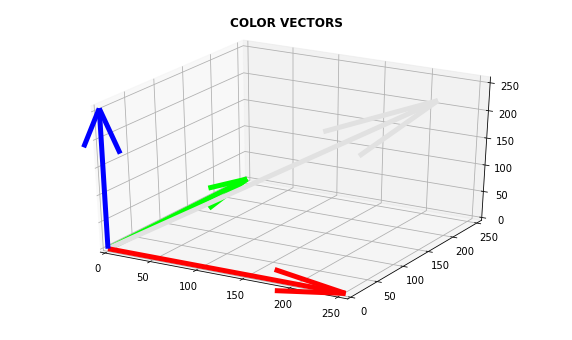

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(10, 6))
ax = plt.subplot(111, projection='3d')

colors = [
    (255,0,0),
    (0,255,0),
    (0,0,255),
    (225,225,225)
]

for r, g, b in colors:
    ax.quiver(0, 0, 0, r, g, b,
              color = np.array([r, g, b])/255,
              linewidth = 5)

ax.set_xlim3d(0, 255)
ax.set_ylim3d(0, 255)
ax.set_zlim3d(0, 255)
ax.dist = 11
plt.title("COLOR VECTORS", fontweight = "bold")
plt.show()

In fact, word embeddings method can be generalized into other item embeddings, which associate any product on an e-commerce website, any videos on Youtube, movies on Netflix with a vector. Of course, in this case, songs can also be a vector.

Can you guess what is the property of a sentence that Word2Vec exploits to learn the vector representation of a word? It is the **sequential nature of the text**. Take a look of the following scrambled sentence:

> *gives Spotify millions you access music service to digital a that is of songs.*

It is difficult for us to understand the text because there is no sequence in the sentence. That's why the sequence of words is crucial in any natural language. This property can be implemented to other data that has sequential nature as well. One such data that has the property is **playlist of songs** in music streaming services. The following image is an example of playlists in Spotify, where each playlist contain a sequence of songs:

<img src="assets/playlist-menu.png" width="600">

In this article, human-made music playlists collected by [Shuo Chen](https://www.cs.cornell.edu/~shuochen/lme/data_page.html) from Cornell University are used to learn the song embeddings. The dataset contains US radio playlists from Yes.com and songs tag from Last.fm since December 2010 to May 2011. Each playlist will be treated as a sentence and each song in the playlist will be treated as one word.

<img src="assets/list-illustration.png" width="500">

Since the data cleansing and modeling process will be quite complicated, here I present the visualization for you to understand the overall workflow:

<img src="assets/mindmap/workflow.png" width="900">

## Import Libraries

Before going any further, let's import necessary libraries such as:
- `pandas` for data analysis
- `numpy` for scientific computing
- `matplotlib` and `seaborn` for data visualization
- `gensim` for topic modelling, in this case Word2vec
- `sklearn` and `spherecluster` for other unsupervised learning algorithm

In [2]:
# Data Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
plt.style.use('seaborn')
sns.set_style("whitegrid")

# Modeling
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
from spherecluster import SphericalKMeans
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from scipy import stats

# Additional
import math
import random
import itertools
import multiprocessing
from tqdm import tqdm
from time import time
import logging
import pickle

## Data Cleansing

The raw data consists of five separate txt files as follow:
1. `song_hash.txt`: mapping from integer `song_id` to song's `title` and `artist` name
2. `tags.txt`: social tags, using integer `song_id` to represent a song
3. `tag_hash.txt`: mapping from integer id to tag's name
4. `train.txt` and `test.txt`: playlists using integer `song_id` to represent a song

In [3]:
FOLDER_PATH = "dataset/yes_complete/"

### Songs
Each song has its own `song_id` which maps to exactly one `title` and `artist` name. There are 75252 unique songs present in `song_hash.txt`.

In [4]:
songs = pd.read_csv(FOLDER_PATH+"song_hash.txt", sep = '\t', header = None,
                    names = ['song_id', 'title', 'artist'], index_col = 0)
songs['artist - title'] = songs['artist'] + " - " + songs['title']
songs

,title,artist,artist - title
song_id,,,
0,Gucci Time (w\/ Swizz Beatz),Gucci Mane,Gucci Mane - Gucci Time (w\/ Swizz Beatz)
1,Aston Martin Music (w\/ Drake & Chrisette Mich...,Rick Ross,Rick Ross - Aston Martin Music (w\/ Drake & Ch...
2,Get Back Up (w\/ Chris Brown),T.I.,T.I. - Get Back Up (w\/ Chris Brown)
3,Hot Toddy (w\/ Jay-Z & Ester Dean),Usher,Usher - Hot Toddy (w\/ Jay-Z & Ester Dean)
4,Whip My Hair,Willow,Willow - Whip My Hair
...,...,...,...
75257,Dearest (I'm So Sorry),Picture Me Broken,Picture Me Broken - Dearest (I'm So Sorry)
75258,USA Today,Alan Jackson,Alan Jackson - USA Today
75259,Superstar,Raul Malo,Raul Malo - Superstar


### Tags
Each song has several tags that exist in `tags.txt` and the mapping is provided in `tag_hash.txt`.

In [5]:
def readTXT(filename, start_line=0, sep=None):
    with open(FOLDER_PATH+filename) as file:
        return [line.rstrip().split(sep) for line in file.readlines()[start_line:]]

In [6]:
tags = readTXT("tags.txt")
tags[7:12]

[['49', '65', '72', '141', '197'], ['11', '35', '154'], ['#'], ['#'], ['#']]

If a song does not have any tag, it is indicated with just a '#' as seen above. Replace it with the string "unknown" instead.

In [7]:
mapping_tags = dict(readTXT("tag_hash.txt", sep = ', '))
mapping_tags['#'] = "unknown"

The `song_tags` dataframe is combined and merged with previous `songs`.

In [8]:
song_tags = pd.DataFrame({'tag_names': [list(map(lambda x: mapping_tags.get(x), t)) for t in tags]})
song_tags.index.name = 'song_id'
songs = pd.merge(left = songs, right = song_tags, how = 'left',
                 left_index = True, right_index = True)
songs.index = songs.index.astype('str')
songs.head()

,title,artist,artist - title,tag_names
song_id,,,,
0,Gucci Time (w\/ Swizz Beatz),Gucci Mane,Gucci Mane - Gucci Time (w\/ Swizz Beatz),[wjlb-fm]
1,Aston Martin Music (w\/ Drake & Chrisette Mich...,Rick Ross,Rick Ross - Aston Martin Music (w\/ Drake & Ch...,"[chill, rnb, loved, hip hop, rap, soft, wjlb-f..."
2,Get Back Up (w\/ Chris Brown),T.I.,T.I. - Get Back Up (w\/ Chris Brown),[wjlb-fm]
3,Hot Toddy (w\/ Jay-Z & Ester Dean),Usher,Usher - Hot Toddy (w\/ Jay-Z & Ester Dean),"[pop, hip-hop]"
4,Whip My Hair,Willow,Willow - Whip My Hair,"[pop, american, dance, rnb, hip-hop, hip hop, ..."


### Unknown Songs

Unknown songs are defined as a song that doesn't have either `artist` or `title`, indicated by dash (-) character. Remove these unknown songs from `songs`.

In [9]:
unknown_songs = songs[(songs['artist'] == '-') | (songs['title'] == '-')]
songs.drop(unknown_songs.index, inplace = True)

### Playlist

`playlist` is a list of lists of songs (represented with its `song_id`) from `train.txt` and `test.txt`. There are 15910 playlists that exist in the data.

In [10]:
playlist = readTXT("train.txt", start_line = 2) + readTXT("test.txt", start_line = 2)
print(f"Playlist Count: {len(playlist)}")

Playlist Count: 15910


Take a look at how the playlist is represented in a list. Recall that these playlists are treated as sentences and the `song_id` as a token of words.

In [11]:
for i in range(0, 3):
    print("-------------------------")
    print(f"Playlist Idx. {i}: {len(playlist[i])} Songs")
    print("-------------------------")
    print(playlist[i])

-------------------------
Playlist Idx. 0: 97 Songs
-------------------------
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '2', '42', '43', '44', '45', '46', '47', '48', '20', '49', '8', '50', '51', '52', '53', '54', '55', '56', '57', '25', '58', '59', '60', '61', '62', '3', '63', '64', '65', '66', '46', '47', '67', '2', '48', '68', '69', '70', '57', '50', '71', '72', '53', '73', '25', '74', '59', '20', '46', '75', '76', '77', '59', '20', '43']
-------------------------
Playlist Idx. 1: 205 Songs
-------------------------
['78', '79', '80', '3', '62', '81', '14', '82', '48', '83', '84', '17', '85', '86', '87', '88', '74', '89', '90', '91', '4', '73', '62', '92', '17', '53', '59', '93', '94', '51', '50', '27', '95', '48', '96', '97', '98', '99', '100', '57', '101', '102', '25', '103', '3', '1

Remove unknown songs from the playlist.

In [12]:
playlist_wo_unknown = [[song_id for song_id in p if song_id not in unknown_songs.index]
                       for p in playlist]

Remove playlist with zero or one song, since the model wouldn't capture any sequence in that list.

In [13]:
clean_playlist = [p for p in playlist_wo_unknown if len(p) > 1]
print(f"Playlist Count After Cleansing: {len(clean_playlist)}")

Playlist Count After Cleansing: 15842


Remove song that doesn't exist in any playlist.

In [14]:
unique_songs = set(itertools.chain.from_iterable(clean_playlist))
song_id_not_exist = set(songs.index) - unique_songs
songs.drop(song_id_not_exist, inplace = True)
print(f"Unique Songs After Cleansing: {songs.shape[0]}")

Unique Songs After Cleansing: 73448


Before there are 75262 unique songs and 15910 playlists. Now we are ready with 73448 unique songs and 15842 playlists.

## Modeling

The `playlist` is splitted into `playlist_train` and `playlist_test` with test size of 1000 playlist for further evaluation.

In [15]:
MODEL_PATH = "model/"
playlist_train, playlist_test = train_test_split(clean_playlist, test_size = 1000,
                                                 shuffle = True, random_state = 123)

### Song2Vec

As mentioned before, Word2Vec is one of the most popular techniques to learn word embeddings using **shallow neural network**. A neural network, like other supervised learning algorithms, requires labeled data to be trained. How can we train a neural network if the data is in a form of sequences of words (i.e. words) or sequences of songs (i.e. playlist) without any target or data label? The network will be trained by creating a so-called **“fake” task**. We won't be interested in the inputs and outputs of the network, rather just train the **weights between input and hidden layer** that are extracted as the vectors. To put it in simple terms, the goal of embeddings can be classified as unsupervised learning, but the process of getting the embeddings in Word2Vec is achieved by supervised learning through a neural network.

Here is the illustration of general Word2Vec architecture:

<img src="assets/word2vec-architecture.png" width="500">
<center><a href="https://arxiv.org/pdf/1411.2738.pdf">Word2Vec Architecture</a></center>

Details:
- The input layer is a one-hot-encoded vector of size $V$ (vocabulary size).
- $W_{V \times N}$ is the weight matrix that projects the input $x$ to the hidden layer. **These values are the embedded vectors**.
- The hidden layer contains $N$ neurons (hyperparameter), it just copies the weighted sum of inputs to the next layer without any activation function.
- $W'_{N \times V}$ is the weight matrix that maps the hidden layer outputs to the final output layer.
- The output layer is again a $V$ length vector, with a softmax activation function.

There are two approaches of Word2Vec in which both are using the same architecture:
- Skip-gram - the fake task would be: given a target word, the model is trying to predict the context words.
- Continuous Bag-Of-Words (CBOW) - the fake task would be: predict the target word by the context words.

In this article, **CBOW** is used instead of Skip-gram, because according to [Google Code Archive](https://code.google.com/archive/p/word2vec/), it trains faster and able to capture the frequent songs more.

<img src="assets/playlist-example.png" width="500">

Target song that are played between context songs is assumed to be similar to each other. If the playlist are designed by users or the services for certain genre, the song embeddings will logically incorporate more information about the genre.

One epoch of CBOW may be breakdown into these steps:

<img src="assets/cbow.png" width="300">

<center><a href="https://arxiv.org/pdf/1411.2738.pdf">CBOW Architecture</a></center>

1. Convert the generated training samples into one-hot vectors $x_1, x_2, ..., x_C$ (contexts) for the input layer. So, the size is $C \times V$
2. Multiply all vector $x$ with $W_{V \times N}$ and then take the sum or mean of embedded vectors.
3. The hidden layer is then multiplied with $W'_{N \times V}$ to get the weighted sum of size $V$.
4. Apply softmax function to turn the weighted sum into probabilities, usually denoted by $\hat{y}$.
5. Error between output and each context word is calculated as follows: ${(\hat{y} - y)}$
6. Backpropagate to re-adjust the weights, by using Gradient Descent optimizer. <br>
    a. All weights in output matrix will be updated. <br>
    b. Only corresponding word vector in the input matrix that will be updated.

Up until this point, you should have understood the general overview of how the Word2Vec works. But, there is an issue with the softmax function — it is **computationally very expensive**, as it requires scanning through the entire output embeddings matrix to compute the probability distribution of all V words, where V can be millions or more. The softmax function is defined as:

$softmax(y_i) = \dfrac{e^{y_i}}{\sum \limits_{y=1}^V e^{y_j}}$

The normalization factor in the denominator also requires $V$ iterations. When implemented in codes, the normalization factor is computed only once and cached as a Python variable, making the algorithm complexity $O(V)$.

Due to this computational inefficiency, softmax function is preferably not used in most implementations of Word2Vec. Instead let's use an alternative called **negative sampling** with sigmoid function, which rephrases the problem into a set of independent binary logistic classification task of algorithm complexity = $O(K+1)$, where $K$ is the number of negative samples and $1$ is the positive sample. Mikolov suggests using $K$ in the range $[5, 20]$ for small vocabulary and $[2, 5]$ for a larger vocabulary.

Don't worry about the code below. We are setting up the logging settings to monitor the training process.

In [16]:
logging.basicConfig(format="%(asctime)s : %(levelname)s : %(message)s", level=logging.INFO)

class Callback(CallbackAny2Vec):
    def __init__(self):
        self.epoch = 1
        self.training_loss = []

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epoch == 1:
            current_loss = loss
        else:
            current_loss = loss - self.loss_previous_step
        print(f"Loss after epoch {self.epoch}: {current_loss}")
        self.training_loss.append(current_loss)
        self.epoch += 1
        self.loss_previous_step = loss

#### Training

By using `gensim`, the training process can be separated into **three distinctive steps**: 

First, the instance of `Word2Vec()` is created to set up the parameters of the model and leave the model uninitialized.
- `size`: dimensionality of the song vectors
- `window`: maximum distance between context and target
- `min_count`: frequency cut-off for a song to be considered in the model
- `sg = 0`: using CBOW architecture
- `negative`: negative sampling data
- `workers`: number of CPU used to train the model

In [17]:
model = Word2Vec(
    size = 256,
    window = 10,
    min_count = 1,
    sg = 0,
    negative = 20,
    workers = multiprocessing.cpu_count()-1)
print(model)

Word2Vec(vocab=0, size=256, alpha=0.025)


Secondly, the method `.build_vocab()` is called to build the vocabulary from a sequence of playlists and thus initialized the model.

In [18]:
logging.disable(logging.NOTSET) # enable logging
t = time()

model.build_vocab(playlist_train)

print(f"Time to build vocab: {round((time() - t), 2)} seconds")

2020-06-20 18:58:25,985 : INFO : collecting all words and their counts
2020-06-20 18:58:25,985 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-06-20 18:58:26,256 : INFO : PROGRESS: at sentence #10000, processed 1805894 words, keeping 63337 word types
2020-06-20 18:58:26,370 : INFO : collected 72047 word types from a corpus of 2670082 raw words and 14842 sentences
2020-06-20 18:58:26,371 : INFO : Loading a fresh vocabulary
2020-06-20 18:58:26,625 : INFO : effective_min_count=1 retains 72047 unique words (100% of original 72047, drops 0)
2020-06-20 18:58:26,626 : INFO : effective_min_count=1 leaves 2670082 word corpus (100% of original 2670082, drops 0)
2020-06-20 18:58:26,800 : INFO : deleting the raw counts dictionary of 72047 items
2020-06-20 18:58:26,801 : INFO : sample=0.001 downsamples 3 most-common words
2020-06-20 18:58:26,801 : INFO : downsampling leaves estimated 2667923 word corpus (99.9% of prior 2670082)
2020-06-20 18:58:26,971 : INFO : estima

Time to build vocab: 12.16 seconds


Finally, `.train()` trains the model. The loggings here are mainly useful for monitoring the loss after each epoch.
- `total_examples`: count of unique vocabulary (songs)
- `epochs`: number of iterations over the dataset (whole playlist)
- `compute_loss`: track model loss

In [19]:
logging.disable(logging.INFO) # disable logging
callback = Callback() # instead, print out loss for each epoch
t = time()

model.train(playlist_train,
            total_examples = model.corpus_count,
            epochs = 100,
            compute_loss = True,
            callbacks = [callback]) 

print(f"Time to train the model: {round((time() - t), 2)} seconds")

Loss after epoch 1: 1198482.625
Loss after epoch 2: 767842.125
Loss after epoch 3: 702445.5
Loss after epoch 4: 687481.75
Loss after epoch 5: 650981.75
Loss after epoch 6: 622703.75
Loss after epoch 7: 622958.0
Loss after epoch 8: 592625.5
Loss after epoch 9: 586250.0
Loss after epoch 10: 593270.5
Loss after epoch 11: 567140.0
Loss after epoch 12: 548471.5
Loss after epoch 13: 536299.0
Loss after epoch 14: 506088.0
Loss after epoch 15: 513666.0
Loss after epoch 16: 509440.0
Loss after epoch 17: 507005.0
Loss after epoch 18: 501982.0
Loss after epoch 19: 483324.0
Loss after epoch 20: 488525.0
Loss after epoch 21: 485746.0
Loss after epoch 22: 485955.0
Loss after epoch 23: 480409.0
Loss after epoch 24: 471087.0
Loss after epoch 25: 485737.0
Loss after epoch 26: 478491.0
Loss after epoch 27: 469261.0
Loss after epoch 28: 456491.0
Loss after epoch 29: 463211.0
Loss after epoch 30: 438492.0
Loss after epoch 31: 384782.0
Loss after epoch 32: 393672.0
Loss after epoch 33: 377558.0
Loss after 

In [20]:
print(model)

Word2Vec(vocab=72047, size=256, alpha=0.025)


In [21]:
model.save(MODEL_PATH+"song2vec.model")

#### Loss Evaluation

Plot the training loss, making sure it decreases after each epoch. The closer the loss to a zero value, the better the model is in predicting a target song given surrounding context songs. Thus, the produced song vectors are more meaningful.

In [18]:
logging.disable(logging.INFO) # disable logging
model = Word2Vec.load(MODEL_PATH+"song2vec.model")

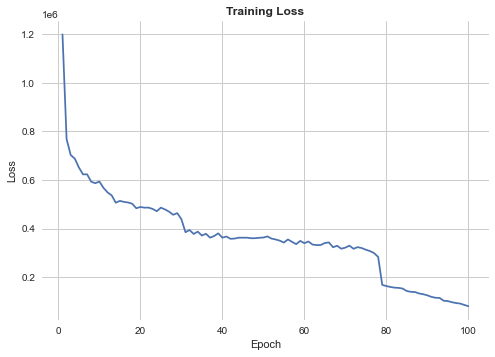

In [19]:
plt.plot(range(1, model.epochs+1), model.callbacks[0].training_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss", fontweight = "bold")
plt.show()

#### Vectors Visualization

The song vectors can be visualized using a gradient of colors. The model is trained using 256 dimensions, therefore there will be 256 color bars for each song, representing element values in the vector. The similarity between songs is calculated using **cosine similarity**:

$similarity(A,B) = cos(\theta) = \frac{A.B}{\|A\| \|B\|}$

Mathematically it measures the cosine of the angle between two vectors $A$ and $B$ which projected in a multi-dimensional space. Song vectors with similar context occupy close spatial positions; the cosine between such vectors should be close to 1, i.e. angle is closer to 0. The smaller the angle, the cosine similarity will be higher.

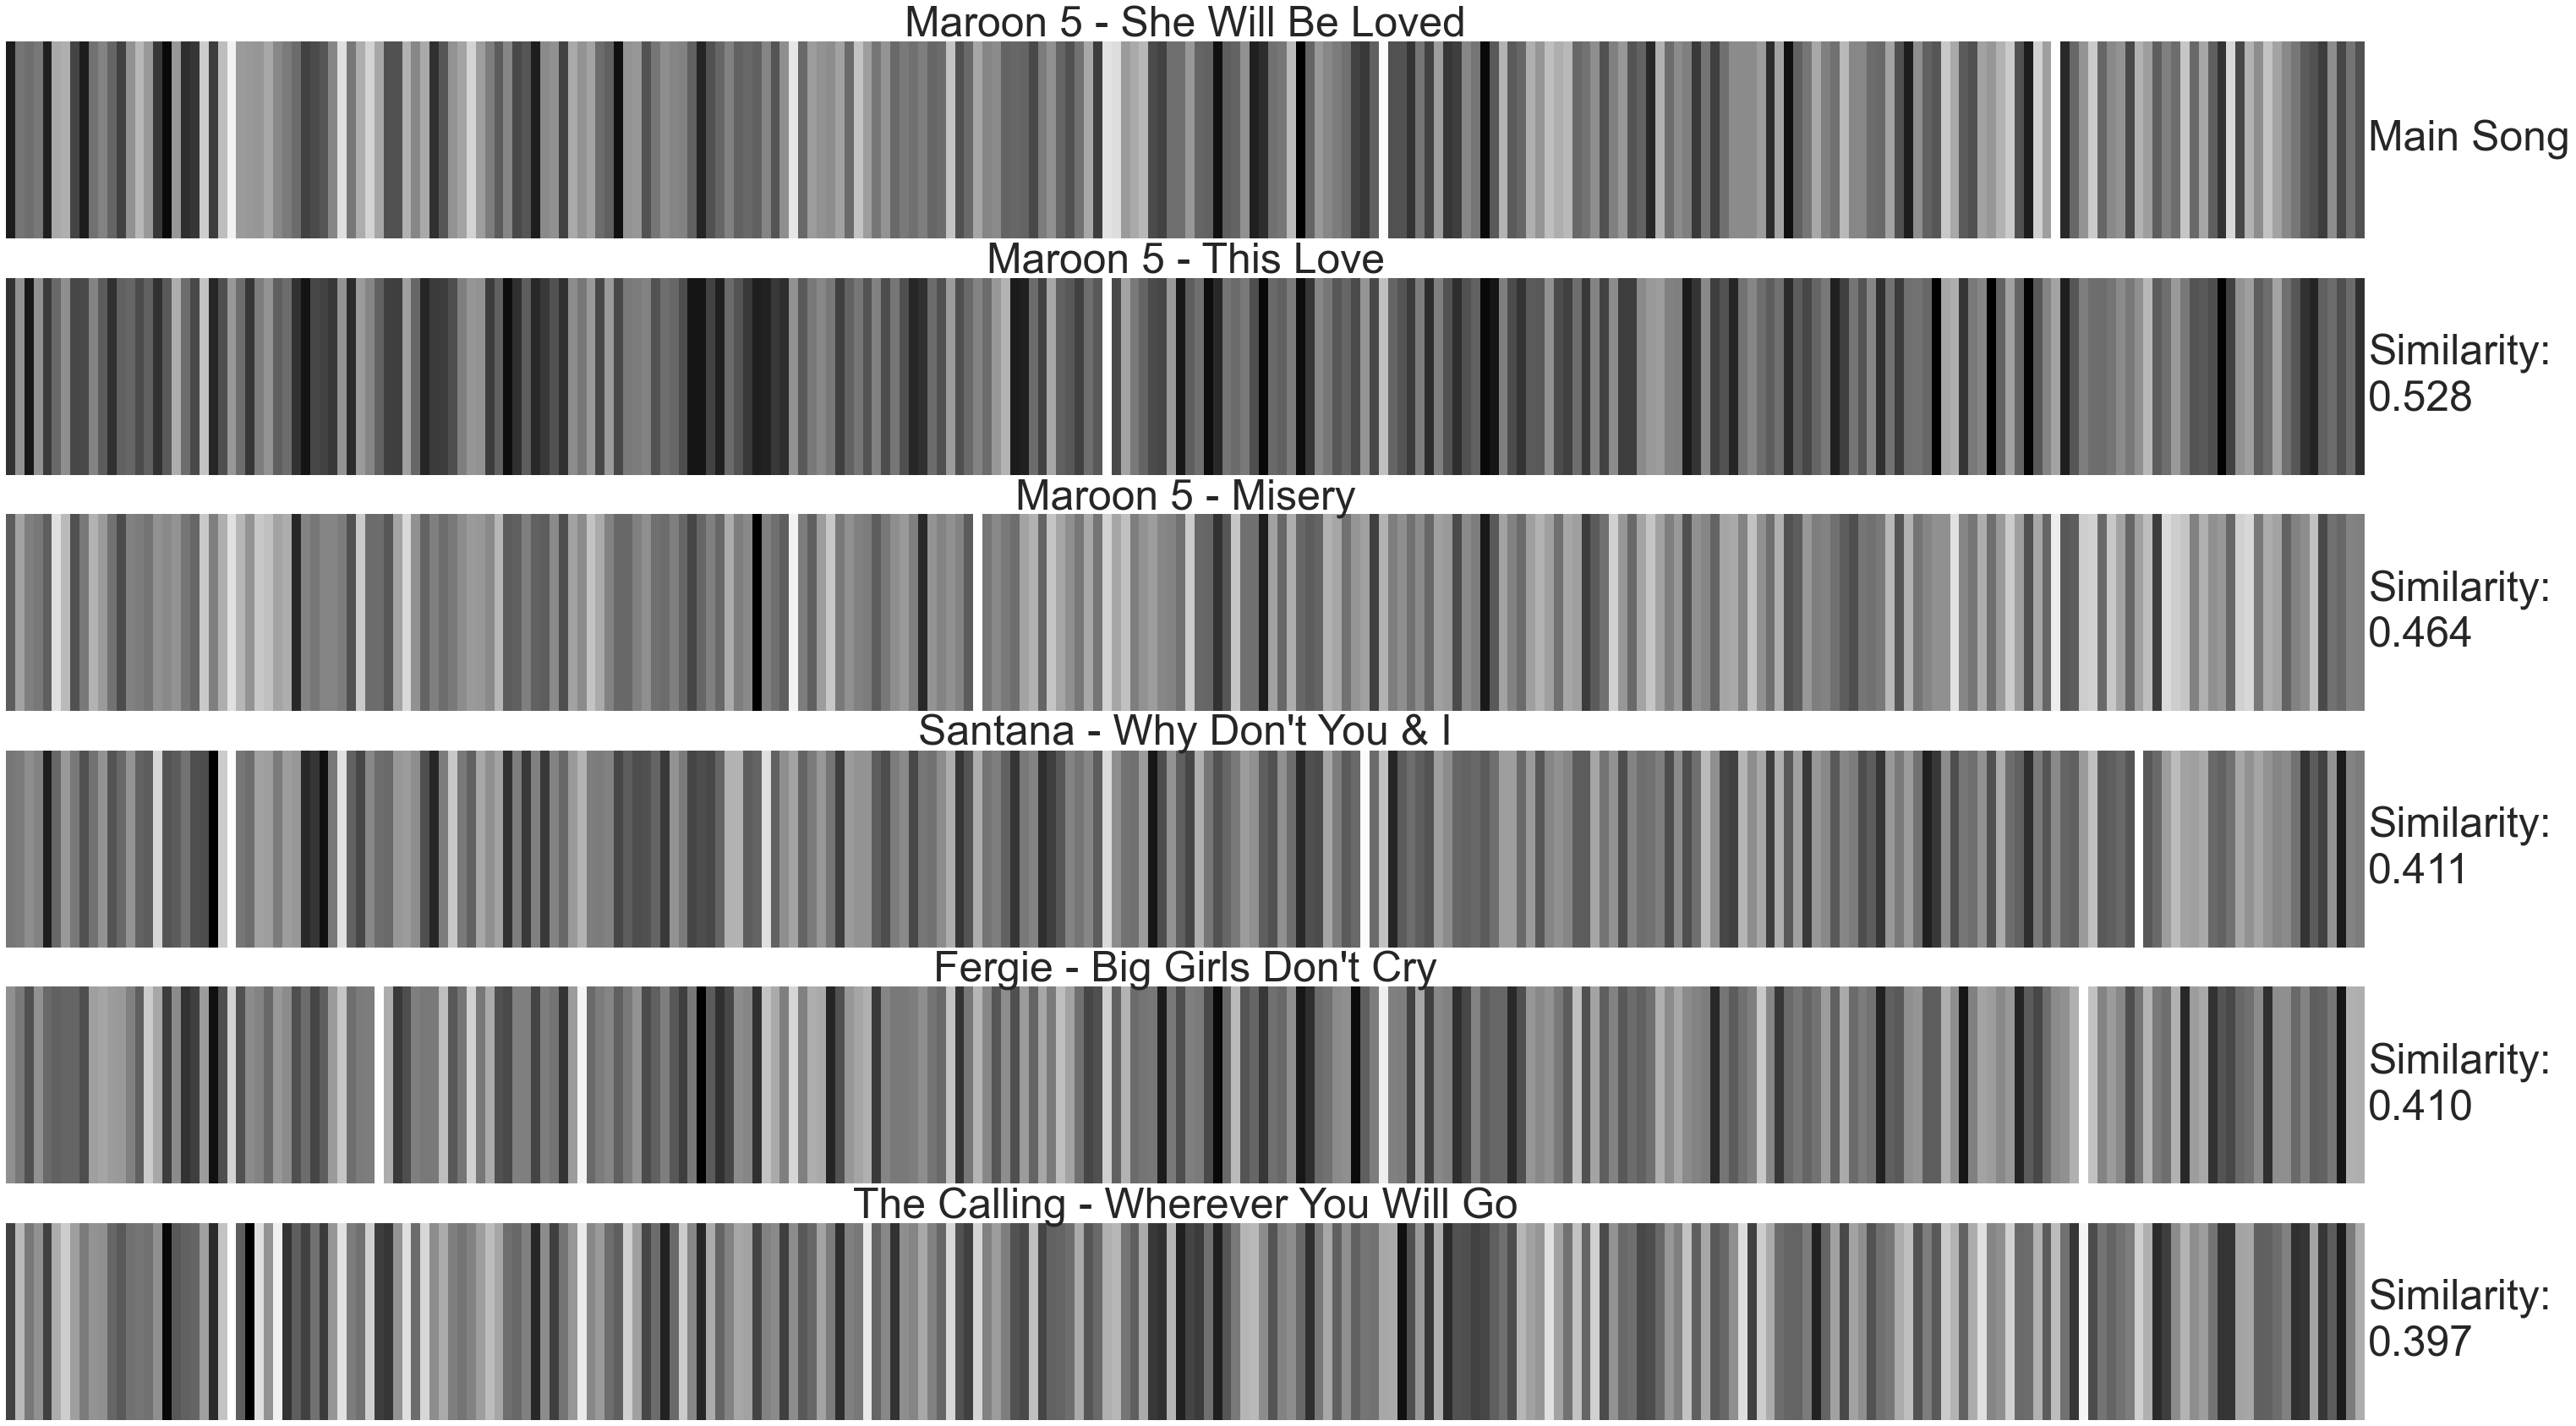

In [20]:
fig, axes = plt.subplots(6, 1, figsize = (50, 30))

slug = '4162'
song_id_list = [(slug, "Main Song"), *[t for t in model.wv.most_similar(slug)[:5]]] 

for ax, (song_id, sim) in zip(axes.flat, song_id_list):
    ax.imshow([model.wv[song_id]], cmap = "binary", aspect = "auto")
    ax.set_title(songs.loc[song_id, "artist - title"], fontsize = 50)
    ax.yaxis.set_label_position("right")
    ax.set_ylabel(f"Similarity:\n{sim:.3f}" if sim != song_id_list[0][1] else sim,
                  rotation = "horizontal", ha = "left", va = "center", fontsize = 50)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

The plot above shows five most similar songs to `song_id = '4162'` (Maroon 5 - She Will Be Loved). Up until now, the model can be used for recommending new songs using cosine similarity, but only based on one main song.

### Clustering

What can we do with the song vectors? One thing is to group them into several clusters using K-Means clustering, but keep in mind that the similarity between vectors is calculated using cosine distance instead of regular (Euclidean) distance. Therefore K-Means with cosine distance should be considered, which often called **Spherical K-Means Clustering**. The idea is to identify the centroid such that it uniforms and minimizes the angle between each vector in a cluster. The intuition is just like looking at a cluster of stars where each point should have consistent spacing between each other. This spacing is referred to as the cosine similarity.

#### Sperical K-Means

Take a look at the picture below for the illustration, and here are the steps:
1. Generate random 2D vectors ranging from (0,0) to (1,1).
2. Project each vector onto a unit circle, so that the vectors are normalized (length is equal to one).
3. From the projected vectors, perform basic k-means clustering into k clusters such that the vector within the same cluster are as similar as possible while the vector from different clusters is as dissimilar as possible.
4. Assign cluster number for each vector.

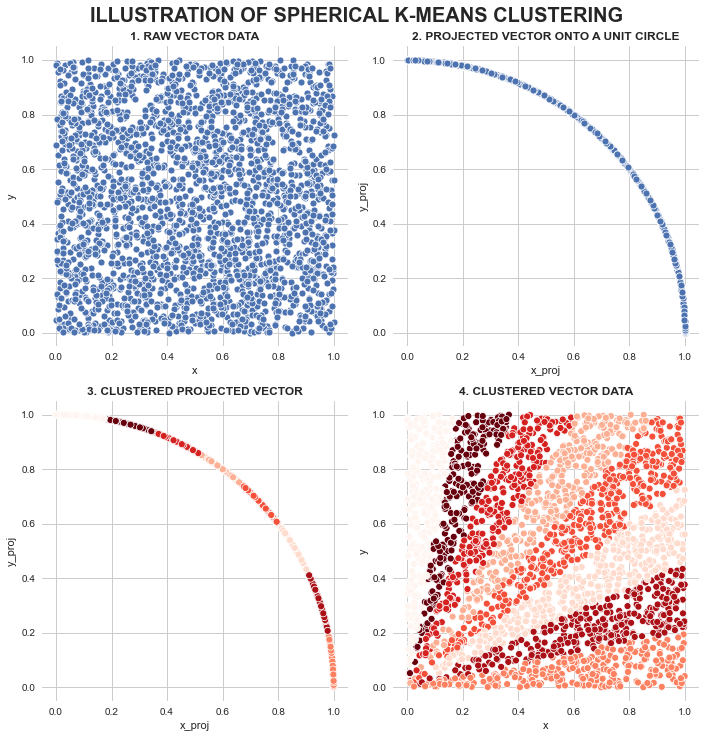

In [21]:
# Generate random vectors
np.random.seed(123)
random_vec = np.random.uniform(0, 1, (2500, 2))
skm_test = SphericalKMeans(n_clusters = 8, n_jobs = -1,
                           random_state = 123).fit(random_vec)

normalized_random_vec = random_vec/np.linalg.norm(random_vec, axis=1, keepdims=True)
cluster_df = pd.DataFrame({'x': random_vec[:,0],
                           'y': random_vec[:,1],
                           'x_proj': normalized_random_vec[:,0],
                           'y_proj': normalized_random_vec[:,1],
                           'cluster': skm_test.labels_})

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(10,10))

plot_list = [('x', 'y'), ('x_proj', 'y_proj'), ('x_proj', 'y_proj'), ('x', 'y')]
hue_list = [None, None, 'cluster', 'cluster']
title_list = ["1. RAW VECTOR DATA", "2. PROJECTED VECTOR ONTO A UNIT CIRCLE",
              "3. CLUSTERED PROJECTED VECTOR", "4. CLUSTERED VECTOR DATA"]

for ax, (x,y), hue, title in zip(axes.flat, plot_list, hue_list, title_list):
    sns.scatterplot(data = cluster_df,
                    x = x, y = y, hue = hue,
                    palette = "Reds", legend = False,
                    ax = ax)
    ax.set_title(title, fontweight = "bold")

plt.suptitle("ILLUSTRATION OF SPHERICAL K-MEANS CLUSTERING",
             fontweight = "bold", fontsize = 20, y = 1.02)
plt.tight_layout()
plt.show()

That being said, let's perform Spherical K-Means on the song vectors by iterating the number of clusters from 10 to 500 so that the optimal number of clusters `k_opt` can be chosen by the elbow method.

In [22]:
embedding_matrix = model.wv[model.wv.vocab.keys()]
embedding_matrix.shape

(72047, 256)

In [40]:
range_k_clusters = (10, 500)
skm_list = []
for k in tqdm(range(*range_k_clusters, 10)):
    skm = SphericalKMeans(n_clusters = k,
                          n_init = 5, n_jobs = -1,
                          random_state = 123).fit(embedding_matrix)
    
    result_dict = {
        "k": k,
        "WCSS": skm.inertia_,
        "skm_object": skm
    }
    
    skm_list.append(result_dict)
skm_df = pd.DataFrame(skm_list).set_index('k')
skm_df.head()

100%|████████████████████████████████████████████████████████████████████████████████| 49/49 [1:07:39<00:00, 82.86s/it]


,WCSS,skm_object
k,,
10,76616.101562,"SphericalKMeans(copy_x=True, init='k-means++',..."
20,68432.601562,"SphericalKMeans(copy_x=True, init='k-means++',..."
30,64753.050781,"SphericalKMeans(copy_x=True, init='k-means++',..."
40,62189.476562,"SphericalKMeans(copy_x=True, init='k-means++',..."
50,60249.101562,"SphericalKMeans(copy_x=True, init='k-means++',..."


In [23]:
def save2Pickle(obj, filename):
    with open(f"{MODEL_PATH}{filename}.pkl", "wb") as file:
        pickle.dump(obj, file)

def loadPickle(filename):
    with open(f"{MODEL_PATH}{filename}.pkl", "rb") as file:
        return pickle.load(file)

In [42]:
save2Pickle(skm_df, "skm_cluster")

In [24]:
skm_df = loadPickle("skm_cluster")

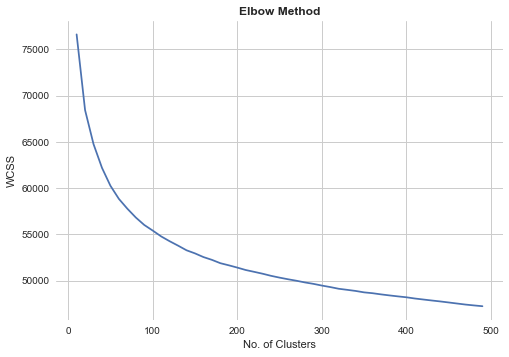

In [25]:
skm_df.WCSS.plot()
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method", fontweight = "bold")
plt.show()

How to locate the optimal number of clusters objectively? Here is the idea:

<img src="assets/elbow-method.png" width="400">
<center><a href="https://www.researchgate.net/figure/Example-of-the-elbow-criterion-applied-over-the-curve-of-within-class-sum-of-squares-per_fig1_282000605">Elbow Method</a></center>

1. Connect the first and last point of the curve with a straight line
2. Calculate the perpendicular distance from each point to that line
3. Consider the longest distance as the elbow

In [26]:
def locateOptimalElbow(x, y):
    # START AND FINAL POINTS
    p1 = (x[0], y[0])
    p2 = (x[-1], y[-1])
    
    # EQUATION OF LINE: y = mx + c
    m = (p2[1] - p1[1]) / (p2[0] - p1[0])
    c = (p2[1] - (m * p2[0]))
    
    # DISTANCE FROM EACH POINTS TO LINE mx - y + c = 0
    a, b = m, -1
    dist = np.array([abs(a*x0+b*y0+c)/math.sqrt(a**2+b**2) for x0, y0 in zip(x,y)])
    return x[np.argmax(dist)]

In [27]:
k_opt = locateOptimalElbow(skm_df.index, skm_df['WCSS'].values)
skm_opt = skm_df.loc[k_opt, "skm_object"]
skm_opt

SphericalKMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=110,
        n_init=5, n_jobs=-1, normalize=True, random_state=123, tol=0.0001,
        verbose=0)

In [28]:
songs_cluster = songs.copy()
songs_cluster.loc[model.wv.vocab.keys(), 'cluster'] = skm_opt.labels_
songs_cluster['cluster'] = songs_cluster['cluster'].fillna(-1).astype('int').astype('category')

In the end, the optimal number of clusters is set to be 110. There is a possibility that some songs don't have the embedded vectors since the `playlist` is split to train and test. For this case, assign the cluster as -1 instead.

#### Visualize Clusters

It is always quite helpful to visualize the embeddings that have been created. Over here, we have song vectors with 256 dimensions. These high-dimensional vectors can't be visualized in our 3D world, so using dimensionality reduction algorithms such as **t-Distributed Stochastic Neighbor Embedding (t-SNE)** helps us map the vectors to a lower dimension. The mathematical detail of t-SNE will not be presented here, but in practice, it tends to produce a visualization with distinctly isolated clusters.

In [ ]:
embedding_tsne = TSNE(n_components = 2, metric = 'cosine',
                      random_state = 123).fit_transform(embedding_matrix)

In [ ]:
save2Pickle(embedding_tsne, "tsne_viz")

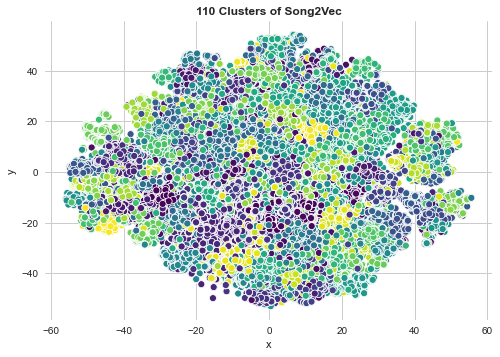

In [32]:
embedding_tsne = loadPickle("tsne_viz")
songs_cluster.loc[model.wv.vocab.keys(), 'x'] = embedding_tsne[:,0]
songs_cluster.loc[model.wv.vocab.keys(), 'y'] = embedding_tsne[:,1]
sns.scatterplot(data = songs_cluster[songs_cluster['cluster'] != -1],
                x = 'x', y = 'y', palette = "viridis",
                hue = 'cluster', legend = False).set_title(f"{k_opt} Clusters of Song2Vec",
                                                           fontweight = "bold")
plt.show()

The cluster might look cluttered since all 110 clusters are being plotted at once. Instead, let's just perform t-SNE on randomly selected 10 clusters and visualize the result.

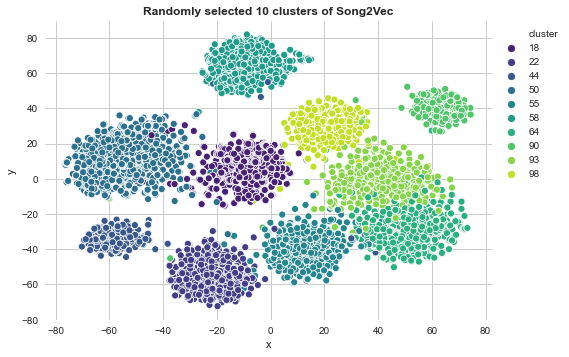

In [33]:
random.seed(100)
random_cluster2plot = random.sample(range(k_opt), 10)
random_songs = songs_cluster[songs_cluster.cluster.isin(random_cluster2plot)].copy()
random_tsne = TSNE(n_components = 2, metric = 'cosine',
                   random_state = 100).fit_transform(model.wv[random_songs.index])
random_songs.loc[random_songs.index, 'x'] = random_tsne[:,0]
random_songs.loc[random_songs.index, 'y'] = random_tsne[:,1]

g = sns.scatterplot(data = random_songs,
                x = 'x', y = 'y', palette = "viridis",
                hue = 'cluster')
g.legend(loc = "upper left", bbox_to_anchor = (1, 1))
g.set_title(f"Randomly selected {len(random_cluster2plot)} clusters of Song2Vec", fontweight = "bold")
plt.show()

Songs that have similar context (by cosine similarity) tend to be plotted next to each other. Thus, creating distinct song clusters. Note that the clusters might look overlap to each other due to the dimensionality reduction, but in the actual dimension, they do not.

## Start Recommending

Congratulations! We are finally ready with the embeddings for every song that exists in `playlist_train`. How these song vectors are then used to suggest similar songs based on a certain playlist? One way is to calculate a **playlist vector** for each playlist by averaging together all the song vectors in that playlist. These vectors then become the query to find similar songs based on cosine similarity. Here is an illustration using a users' music streaming playlist:

<img src="assets/playlist-vector.gif" width="500">
<center><a href="https://towardsdatascience.com/using-word2vec-for-music-recommendations-bb9649ac2484">Song2Vec Average</a></center>

For each playlist in `playlist_test`, calculate the average vectors using `meanVectors()` function. If the song hasn't been embedded before, neglect the song instead.

In [34]:
def meanVectors(playlist):
    vec = []
    for song_id in playlist:
        try:
            vec.append(model.wv[song_id])
        except KeyError:
            continue
    return np.mean(vec, axis=0)

In [35]:
playlist_vec = list(map(meanVectors, playlist_test))

For each playlist vector, recommend top $n$ similar songs based on the cosine similarity.

In [36]:
def similarSongsByVector(vec, n = 10, by_name = True):
    # extract most similar songs for the input vector
    similar_songs = model.wv.similar_by_vector(vec, topn = n)
    
    # extract name and similarity score of the similar products
    if by_name:
        similar_songs = [(songs.loc[song_id, "artist - title"], sim)
                              for song_id, sim in similar_songs]
    
    return similar_songs

Let's test the song embeddings to recommend top 10 songs for `playlist_test` in index `305`.

In [37]:
def print_recommended_songs(idx, n):
    print("============================")
    print("SONGS PLAYLIST")
    print("============================")
    for song_id in playlist_test[idx]:
        print(songs.loc[song_id, "artist - title"])
    print()
    print("============================")
    print(f"TOP {n} RECOMMENDED SONGS")
    print("============================")
    for song, sim in similarSongsByVector(playlist_vec[idx], n):
        print(f"[Similarity: {sim:.3f}] {song}")
    print("============================")

In [38]:
print_recommended_songs(idx = 305, n = 10)

SONGS PLAYLIST
Selena - Como La Flor
The Texas Tornados - Who Were You Thinkin' Of
Selena - Sentimientos

TOP 10 RECOMMENDED SONGS
[Similarity: 0.835] Selena - Como La Flor
[Similarity: 0.779] Selena - Sentimientos
[Similarity: 0.763] Little Joe Y La Familia - Borrachera
[Similarity: 0.751] Lorenzo Antonio - Con La Misma Espina
[Similarity: 0.745] Tierra Tejana - Eres Casado
[Similarity: 0.742] Jennifer Y Los Jetz - Me Piden
[Similarity: 0.730] The Texas Tornados - (Hey Baby) Que Paso
[Similarity: 0.712] The Texas Tornados - Who Were You Thinkin' Of
[Similarity: 0.709] Ruben Vela - La Papaya
[Similarity: 0.704] Sparx - Lo Dice Mi Corazon


Interestingly, the model is able to capture and recommend new songs based on the "Spanish" genre from `playlist_test` indexed at `305` without being explicitly stated. Great! The final step is to evaluate how this recommender performs.

## Evaluation

One way to evaluate the performance of a recommender system is by computing **hit rate** as follows:
1. For each song in a playlist, intentionally **Leave-One-Out (LOO)** this song.
2. By using several systems below, try to guess the LOO song.
3. Ask the recommender for top $n$ recommended songs.
4. If the LOO song appears in the top $n$ recommendation, consider it as a **HIT**. Otherwise not.
5. Repeat the LOO process until the end of the playlist. Then, the hit rate of a playlist is calculated by dividing the number of HIT with the length of a playlist.
6. Repeat step 1-5 for all playlist in `playlist_test` and calculate the **Average Hit Rate at $n$ (AHR@n)**.

In [39]:
top_n_songs = 25

### Random Recommender

As a baseline, let's try to guess the LOO song randomly without any system.

In [40]:
def hitRateRandom(playlist, n_songs):
    hit = 0
    for i, target in enumerate(playlist):
        random.seed(i)
        recommended_songs = random.sample(list(songs.index), n_songs)
        hit += int(target in recommended_songs)
    return hit/len(playlist)

In [41]:
eval_random = pd.Series([hitRateRandom(p, n_songs = top_n_songs)
                         for p in tqdm(playlist_test, position=0, leave=True)])
eval_random.mean()

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [35:58<00:00,  2.16s/it]


0.00030413731380910425

### Song Tags Recommender

It is possible to recommend based on song tags provided on the data as follows:
1. Create a list of song `tag_names` that surrounds the LOO song. The maximum distance between the LOO and context songs is defined by `window`.
2. List all possible songs from the list.
3. Take $n$ songs randomly from the possible songs list.

In [42]:
mapping_tag2song = songs.explode('tag_names').reset_index().groupby('tag_names')['song_id'].apply(list)
mapping_tag2song

tag_names
00s           [16, 23, 28, 30, 38, 41, 46, 49, 55, 58, 68, 8...
10s           [6, 13, 14, 18, 19, 27, 46, 51, 57, 59, 60, 62...
1960s         [516, 612, 622, 626, 629, 897, 1336, 1337, 137...
1970s         [499, 500, 522, 537, 608, 615, 618, 619, 881, ...
1980s         [501, 502, 536, 556, 618, 837, 1378, 1505, 150...
                                    ...                        
usa           [47, 52, 91, 187, 194, 197, 201, 298, 324, 382...
vocal         [14, 91, 96, 97, 125, 194, 201, 386, 407, 424,...
vocal jazz    [42, 592, 599, 872, 908, 1043, 1097, 1104, 117...
wjlb-fm       [0, 1, 2, 4, 5, 6, 8, 14, 18, 19, 20, 22, 25, ...
worship       [104, 106, 384, 566, 643, 732, 737, 1109, 1115...
Name: song_id, Length: 251, dtype: object

In [43]:
def hitRateContextSongTag(playlist, window, n_songs):
    hit = 0
    context_target_list = [([playlist[w] for w in range(idx-window, idx+window+1)
                             if not(w < 0 or w == idx or w >= len(playlist))], target)
                           for idx, target in enumerate(playlist)]
    for i, (context, target) in enumerate(context_target_list):
        context_song_tags = set(songs.loc[context, 'tag_names'].explode().values)
        possible_songs_id = set(mapping_tag2song[context_song_tags].explode().values)
        
        random.seed(i)
        recommended_songs = random.sample(possible_songs_id, n_songs)
        hit += int(target in recommended_songs)
    return hit/len(playlist)

In [44]:
eval_song_tag = pd.Series([hitRateContextSongTag(p, model.window, n_songs = top_n_songs)
                           for p in tqdm(playlist_test, position=0, leave=True)])
eval_song_tag.mean()

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [1:26:35<00:00,  5.20s/it]


0.0005425495180688559

### Cluster-based Recommender

To improve further, let's utilize the result of clustering in the modeling section:
1. Identify which cluster number is the most frequent (by majority voting) in surrounding songs. The maximum distance between the LOO and context songs is defined by `window`.
2. List out possible songs from that majority cluster.
3. Take $n$ songs randomly from the possible songs list.

In [45]:
def hitRateClustering(playlist, window, n_songs):
    hit = 0
    context_target_list = [([playlist[w] for w in range(idx-window, idx+window+1)
                             if not(w < 0 or w == idx or w >= len(playlist))], target)
                           for idx, target in enumerate(playlist)]
    for context, target in context_target_list:
        cluster_numbers = skm_opt.predict([model.wv[c] for c in context if c in model.wv.vocab.keys()])
        majority_voting = stats.mode(cluster_numbers).mode[0]
        possible_songs_id = list(songs_cluster[songs_cluster['cluster'] == majority_voting].index)
        recommended_songs = random.sample(possible_songs_id, n_songs)
        songs_id = list(zip(*recommended_songs))[0]
        hit += int(target in songs_id)
    return hit/len(playlist)

In [46]:
eval_clust = pd.Series([hitRateClustering(p, model.window, n_songs = top_n_songs)
                           for p in tqdm(playlist_test, position=0, leave=True)])
eval_clust.mean()

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:20<00:00,  4.98it/s]


0.005054657281168753

### Song2Vec Recommender

Lastly, evaluate the CBOW Song2Vec model as follows:
1. Take the average vectors of surrounding context songs using previously defined `meanVectors()` function. The maximum distance is defined by `window`.
2. Find top $n$ similar songs based on cosine similarity using `similarSongsByVector()` function.

In [47]:
def hitRateSong2Vec(playlist, window, n_songs):
    hit = 0
    context_target_list = [([playlist[w] for w in range(idx-window, idx+window+1)
                             if not(w < 0 or w == idx or w >= len(playlist))], target)
                           for idx, target in enumerate(playlist)]
    for context, target in context_target_list:
        context_vector = meanVectors(context)
        recommended_songs = similarSongsByVector(context_vector, n = n_songs, by_name = False)
        songs_id = list(zip(*recommended_songs))[0]
        hit += int(target in songs_id)
    return hit/len(playlist)

In [48]:
eval_song2vec = pd.Series([hitRateSong2Vec(p, model.window, n_songs = top_n_songs)
                           for p in tqdm(playlist_test, position=0, leave=True)])
eval_song2vec.mean()

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [16:13<00:00,  1.03it/s]


0.11958469298590102

### Comparison

Finally, we compare the calculated Average Hit Rate at 25 (AHR@25) of the four recommender systems. The higher the AHR, the better is the system. From the bar plot below, Song2Vec outperforms other methods in terms of hit rate, which means that it can recommend a song well based on surrounding context songs. In a real-life scenario, this system may likely to be low quality since the AHR is only around 10%, but still, it is much better than no recommender system at all.

In [53]:
eval_df = pd.concat([eval_random.rename("Random"),
           eval_song_tag.rename("Song Tag"),
           eval_clust.rename("Clustering"),
           eval_song2vec.rename("Song2Vec")], axis = 1)
save2Pickle(eval_df, "eval_df")

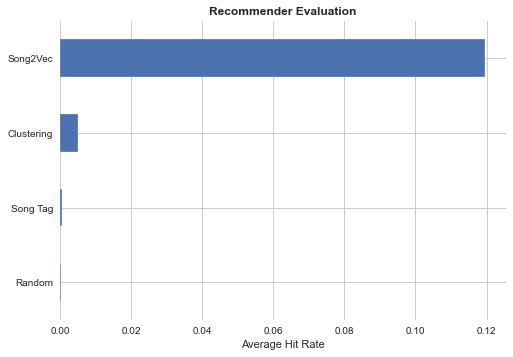

In [54]:
eval_df = loadPickle("eval_df")
g = eval_df.mean().sort_values().plot(kind = 'barh')
g.set_xlabel("Average Hit Rate")
g.set_title("Recommender Evaluation", fontweight = "bold")
plt.show()

## Conclusion

Song2Vec is an implementation of Word2Vec which able to capture the context of a song based on surrounding songs in a playlist. In this notebook, we successfully exploit the sequential property of a playlist and represent each song with a 256-dimensional vector. This vector representation is then used as a recommender system based on cosine similarity score. The objective of a music recommender is to create accurate personalized recommendations from historical playlist or listening queue. Therefore, metric such as AHR@n is used to evaluate how many times (on average) a song is listed on the top-$n$ recommended songs based on surrounding context songs.

Things to be taken carefully when applying Song2Vec on its own is the cold start problem, a condition where it is impossible to recommend any songs to a new user or even recommend a new song to any users. This can be efficiently handled by combining the recommender using a content-based technique, which utilizes explicit features or characteristics of the songs as demonstrated in the "Song Tags Recommender" section.

Maybe you're wondering what are other implementations of Word2Vec? Here is the list for you: 
- Product recommendations: Using purchase receipts in a transaction to capture an item embeddings to learn the user's purchase activity.
- Listing recommendations: The user activity is in the form of click data, which can be represented as a sequence of listings that a user viewed.
- Matching advertisement to search query: Data consist of sequential search sessions, including entered query, clicked advertisement, and search results.